# Part 3: Modelling 🧠

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier


In [2]:
df=pd.read_csv("df_cleaned.csv")

In [3]:
df.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,...,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group,id.1,status_group
0,69572,6000.0,1390,Roman Catholic Church,34.938093,-9.856322,Lake Nyasa,Iringa,109,True,...,1999,gravity,user-group,annually,soft,enough,groundwater,communal standpipe,69572,functional
1,8776,0.0,1399,other,34.698766,-2.147466,Lake Victoria,Mara,280,True,...,2010,gravity,user-group,never pay,soft,insufficient,surface,communal standpipe,8776,functional
2,34310,25.0,686,World Vision,37.460664,-3.821329,Pangani,Manyara,250,True,...,2009,gravity,user-group,per bucket,soft,enough,surface,communal standpipe,34310,functional
3,67743,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,True,...,1986,submersible,user-group,never pay,soft,dry,groundwater,communal standpipe,67743,non functional
4,9944,20.0,0,DWE,39.172796,-4.765587,Pangani,Tanga,1,True,...,2009,submersible,user-group,per bucket,salty,enough,unknown,communal standpipe,9944,functional


## Handling Outliers 🚨📉


([<matplotlib.axis.XTick at 0x1b85d315d90>,
 [Text(0, 0, 'amount_tsh'),
  Text(1, 0, 'gps_height'),
  Text(2, 0, 'population'),
  Text(3, 0, 'construction_year')])

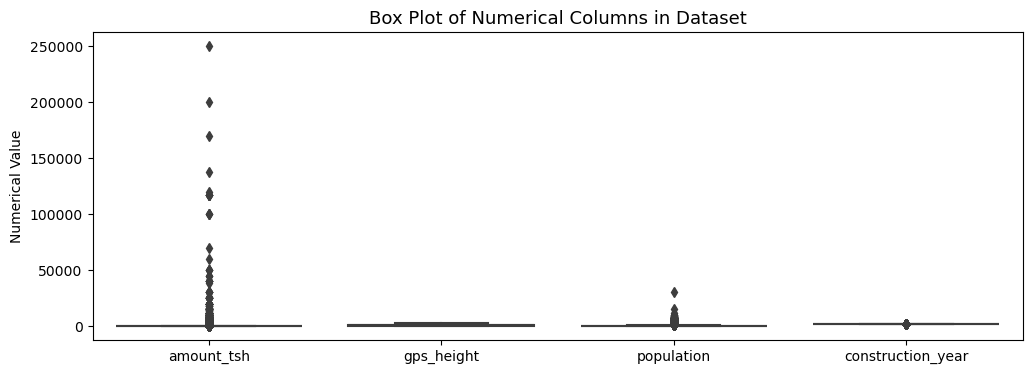

In [4]:
numerical_cols = ['amount_tsh', 'gps_height', 'population', 'construction_year']
plt.figure(figsize=(12, 4))
sns.boxplot(data=[df[col] for col in numerical_cols])
plt.title("Box Plot of Numerical Columns in Dataset", fontsize=13)
plt.ylabel("Numerical Value")
plt.xticks(range(0,4), numerical_cols)

In [5]:
df["status_group"].value_counts()

status_group
functional                 27590
non functional             19359
functional needs repair     3306
Name: count, dtype: int64

Text(0, 0.5, 'Status_group')

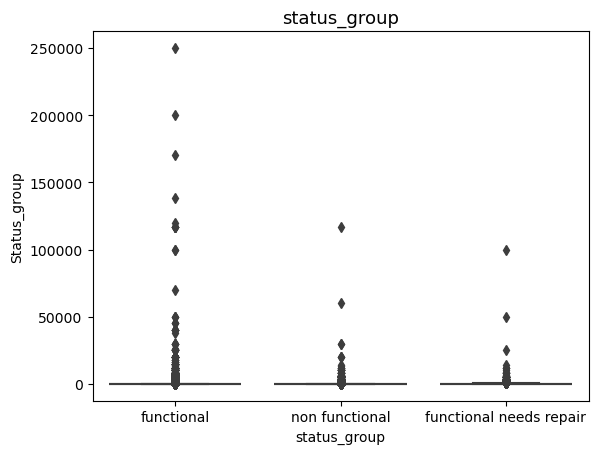

In [6]:
sns.boxplot(y='amount_tsh', x="status_group", data=df)
plt.title("status_group", fontsize=13)
plt.ylabel("amount -TSH ")
plt.ylabel("Status_group")

Based on the provided figures, it is advisable not to remove outliers in the amount_tsh column as they likely represent real variations in water availability across different wells. These outliers are present in all status_group categories (functional, non-functional, and functional needs repair), suggesting they carry significant insights into the conditions and performance of the wells. Removing them could result in a loss of valuable information and an incomplete understanding of the dataset. Instead, transformations such as log scaling can mitigate the impact of outliers while preserving the integrity and richness of the data, ensuring robust and comprehensive analysis.

## Checking  for normal distribution in continuous columns

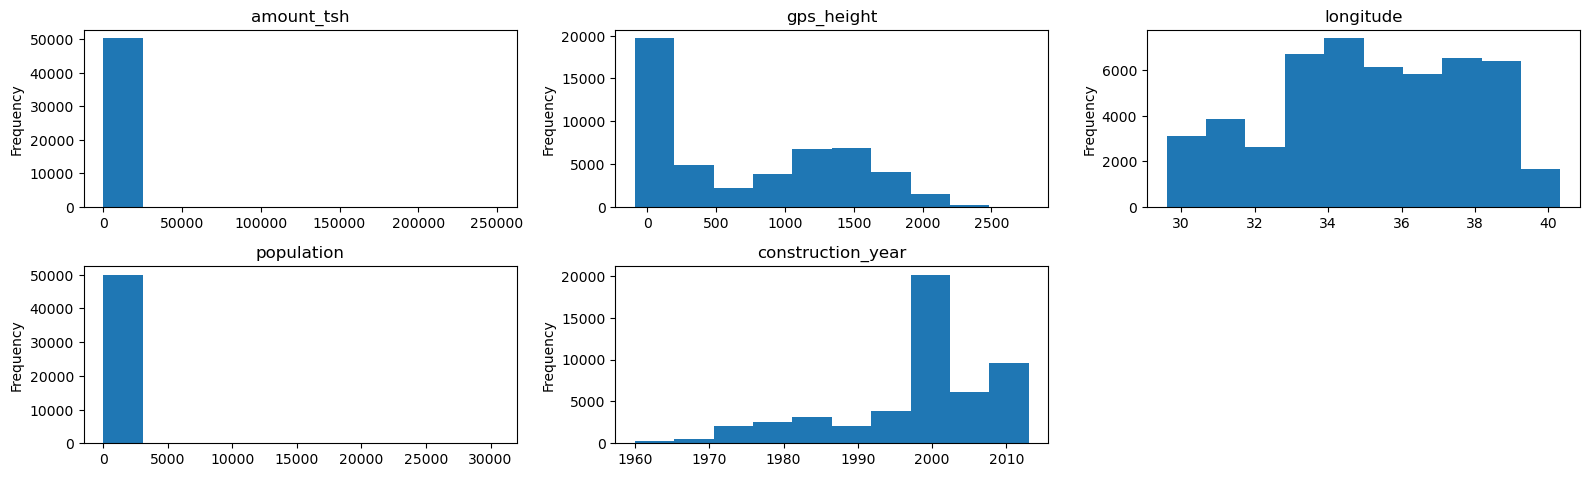

In [7]:
# Histogram of continuous variables
continuous = ['amount_tsh','gps_height','longitude', 'population','construction_year']
fig = plt.figure(figsize=(16, 7))
for i, col in enumerate(continuous):
    ax = plt.subplot(3, 3, i+1)
    df[col].plot(kind='hist', ax=ax, title=col)
plt.tight_layout()

The histograms for the five continuous variables—amount_tsh, gps_height, longitude, population, and construction_year—illustrate their frequency distributions to assess normality. The amount_tsh variable shows most values clustered at zero. The gps_height variable is right-skewed with a significant number of values at zero. The longitude variable has a fairly uniform distribution without clear normality. The population variable is highly right-skewed with most values concentrated at zero. The construction_year variable displays a right-skewed distribution with a higher frequency of more recent years. These visualizations indicate that none of the variables follow a normal distribution.

## Label encode and onehot encoder 🔄

In [8]:
label_mapping = {False: 0, True: 1}
df["public_meeting"] = df["public_meeting"].map(label_mapping)
df["permit"] = df["permit"].map(label_mapping)

In [9]:
label_mapping_s = {"non functional": 0, "functional needs repair": 1, "functional": 2}
df["status_group"] = df["status_group"].replace(label_mapping_s)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50255 entries, 0 to 50254
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     50255 non-null  int64  
 1   amount_tsh             50255 non-null  float64
 2   gps_height             50255 non-null  int64  
 3   installer              50255 non-null  object 
 4   longitude              50255 non-null  float64
 5   latitude               50255 non-null  float64
 6   basin                  50255 non-null  object 
 7   region                 50255 non-null  object 
 8   population             50255 non-null  int64  
 9   public_meeting         50255 non-null  int64  
 10  scheme_management      50255 non-null  object 
 11  permit                 50255 non-null  int64  
 12  construction_year      50255 non-null  int64  
 13  extraction_type_class  50255 non-null  object 
 14  management_group       50255 non-null  object 
 15  pa

In [11]:
df.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,...,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group,id.1,status_group
0,69572,6000.0,1390,Roman Catholic Church,34.938093,-9.856322,Lake Nyasa,Iringa,109,1,...,1999,gravity,user-group,annually,soft,enough,groundwater,communal standpipe,69572,2
1,8776,0.0,1399,other,34.698766,-2.147466,Lake Victoria,Mara,280,1,...,2010,gravity,user-group,never pay,soft,insufficient,surface,communal standpipe,8776,2
2,34310,25.0,686,World Vision,37.460664,-3.821329,Pangani,Manyara,250,1,...,2009,gravity,user-group,per bucket,soft,enough,surface,communal standpipe,34310,2
3,67743,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,1,...,1986,submersible,user-group,never pay,soft,dry,groundwater,communal standpipe,67743,0
4,9944,20.0,0,DWE,39.172796,-4.765587,Pangani,Tanga,1,1,...,2009,submersible,user-group,per bucket,salty,enough,unknown,communal standpipe,9944,2


In [12]:
df.permit.value_counts()

permit
1    34837
0    15418
Name: count, dtype: int64

In [13]:
df.status_group.value_counts()

status_group
2    27590
0    19359
1     3306
Name: count, dtype: int64

In [14]:
df.columns

Index(['id', 'amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'population', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'water_quality', 'quantity_group',
       'source_class', 'waterpoint_type_group', 'id.1', 'status_group'],
      dtype='object')

In [15]:
df.permit.head()

0    0
1    1
2    1
3    1
4    1
Name: permit, dtype: int64

In [16]:
df=df.drop(["id.1"], axis=1)

In [17]:
df.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,...,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group,status_group
0,69572,6000.0,1390,Roman Catholic Church,34.938093,-9.856322,Lake Nyasa,Iringa,109,1,...,0,1999,gravity,user-group,annually,soft,enough,groundwater,communal standpipe,2
1,8776,0.0,1399,other,34.698766,-2.147466,Lake Victoria,Mara,280,1,...,1,2010,gravity,user-group,never pay,soft,insufficient,surface,communal standpipe,2
2,34310,25.0,686,World Vision,37.460664,-3.821329,Pangani,Manyara,250,1,...,1,2009,gravity,user-group,per bucket,soft,enough,surface,communal standpipe,2
3,67743,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,1,...,1,1986,submersible,user-group,never pay,soft,dry,groundwater,communal standpipe,0
4,9944,20.0,0,DWE,39.172796,-4.765587,Pangani,Tanga,1,1,...,1,2009,submersible,user-group,per bucket,salty,enough,unknown,communal standpipe,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50255 entries, 0 to 50254
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     50255 non-null  int64  
 1   amount_tsh             50255 non-null  float64
 2   gps_height             50255 non-null  int64  
 3   installer              50255 non-null  object 
 4   longitude              50255 non-null  float64
 5   latitude               50255 non-null  float64
 6   basin                  50255 non-null  object 
 7   region                 50255 non-null  object 
 8   population             50255 non-null  int64  
 9   public_meeting         50255 non-null  int64  
 10  scheme_management      50255 non-null  object 
 11  permit                 50255 non-null  int64  
 12  construction_year      50255 non-null  int64  
 13  extraction_type_class  50255 non-null  object 
 14  management_group       50255 non-null  object 
 15  pa

In [19]:
df.payment_type.value_counts()

payment_type
never pay     20850
per bucket     8514
monthly        7598
unknown        5256
on failure     3694
annually       3476
other           867
Name: count, dtype: int64

In [20]:
columns_encode=df[["installer", "basin", "region", "scheme_management", "management_group", 
         "extraction_type_class", "payment_type", 'water_quality',"quantity_group", 
         "source_class", "waterpoint_type_group"]]

In [21]:
columns_encode.head()

,installer,basin,region,scheme_management,management_group,extraction_type_class,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group
0,Roman Catholic Church,Lake Nyasa,Iringa,VWC,user-group,gravity,annually,soft,enough,groundwater,communal standpipe
1,other,Lake Victoria,Mara,Other,user-group,gravity,never pay,soft,insufficient,surface,communal standpipe
2,World Vision,Pangani,Manyara,VWC,user-group,gravity,per bucket,soft,enough,surface,communal standpipe
3,UNICEF,Ruvuma / Southern Coast,Mtwara,VWC,user-group,submersible,never pay,soft,dry,groundwater,communal standpipe
4,DWE,Pangani,Tanga,VWC,user-group,submersible,per bucket,salty,enough,unknown,communal standpipe


In [22]:
df_copy=df.copy

In [23]:
columns_to_encode = ["installer", "basin", "region", "scheme_management", 
                     "management_group", "extraction_type_class", "payment_type", 
                     'water_quality', "quantity_group", "source_class", 
                     "waterpoint_type_group"]

# Create dummy variables for all specified columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True, dtype=int)


In [24]:
df_store=df_encoded.copy()
df_encoded.head()

,id,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,status_group,...,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,6000.0,1390,34.938093,-9.856322,109,1,0,1999,2,...,0,0,0,0,0,1,0,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,280,1,1,2010,2,...,1,0,0,1,0,1,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,250,1,1,2009,2,...,0,0,0,1,0,1,0,0,0,0
3,67743,0.0,263,38.486161,-11.155298,58,1,1,1986,0,...,0,0,0,0,0,1,0,0,0,0
4,9944,20.0,0,39.172796,-4.765587,1,1,1,2009,2,...,0,0,0,0,1,1,0,0,0,0


## Standard scaler

In [25]:
scaled_columns=["amount_tsh", "gps_height", "population"] 

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the specified columns
df_encoded[scaled_columns] = scaler.fit_transform(df_encoded[scaled_columns])

In [26]:
df_encoded.head()

,id,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,status_group,...,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,1.982513,0.958060,34.938093,-9.856322,-0.160357,1,0,1999,2,...,0,0,0,0,0,1,0,0,0,0
1,8776,-0.125073,0.970985,34.698766,-2.147466,0.192981,1,1,2010,2,...,1,0,0,1,0,1,0,0,0,0
2,34310,-0.116291,-0.052994,37.460664,-3.821329,0.130992,1,1,2009,2,...,0,0,0,1,0,1,0,0,0,0
3,67743,-0.125073,-0.660487,38.486161,-11.155298,-0.265738,1,1,1986,0,...,0,0,0,0,0,1,0,0,0,0
4,9944,-0.118048,-1.038196,39.172796,-4.765587,-0.383518,1,1,2009,2,...,0,0,0,0,1,1,0,0,0,0


## Reingineering or data transformation -
Transforming the status_group column

2 = functional water points ,

1 = functional but needs repair water points,

0 = non-functinal water points

We collect functional and functional but needs help target together and make them 1, non-functional is 0.

In [27]:
df_encoded["status_group"] = df_encoded["status_group"].apply(lambda x: 1 if x in [1, 2] else 0)

In [28]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50255 entries, 0 to 50254
Columns: 110 entries, id to waterpoint_type_group_other
dtypes: float64(5), int32(100), int64(5)
memory usage: 23.0 MB


In [29]:
df_encoded.corr()

,id,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,status_group,...,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
id,1.000000,-0.007901,-0.005373,0.001720,0.001445,-0.002567,0.004694,-0.000953,-0.002760,-0.000470,...,0.000391,0.005364,-0.000525,-0.007318,0.005343,-0.001162,0.001364,0.004586,0.006472,-0.008509
amount_tsh,-0.007901,1.000000,0.082637,0.010142,-0.063356,0.013481,0.017930,0.030124,-0.002554,0.059639,...,-0.018731,-0.018547,-0.006634,0.047906,-0.006237,0.041138,-0.001476,-0.020698,-0.006294,-0.033305
gps_height,-0.005373,0.082637,1.000000,-0.039880,-0.041735,0.117485,0.063122,0.094768,-0.087130,0.138522,...,-0.013850,-0.069189,-0.019307,0.069812,-0.036931,0.248542,-0.007321,-0.203423,-0.007585,-0.103159
longitude,0.001720,0.010142,-0.039880,1.000000,-0.282660,0.039393,0.035379,0.004119,-0.033382,-0.017651,...,0.084331,-0.025720,-0.002696,-0.055485,0.051492,0.189528,0.010557,-0.191715,-0.161019,0.035508
latitude,0.001445,-0.063356,-0.041735,-0.282660,1.000000,-0.005907,0.032891,0.139809,0.061152,0.026222,...,0.140463,0.013710,0.007784,-0.027624,0.020655,-0.107392,0.004726,0.054337,0.113904,0.045600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
waterpoint_type_group_communal standpipe,-0.001162,0.041138,0.248542,0.189528,-0.107392,-0.018230,0.087954,0.154419,-0.037694,0.118176,...,-0.007619,-0.051940,-0.021184,0.371208,0.000046,1.000000,-0.014986,-0.775662,-0.147033,-0.412697
waterpoint_type_group_dam,0.001364,-0.001476,-0.007321,0.010557,0.004726,0.015312,-0.002435,0.007852,-0.002581,0.005878,...,0.001265,-0.003012,-0.001014,0.017484,-0.000777,-0.014986,1.000000,-0.007210,-0.001367,-0.003836
waterpoint_type_group_hand pump,0.004586,-0.020698,-0.203423,-0.191715,0.054337,0.013834,-0.036155,-0.122284,0.113936,0.051312,...,-0.000872,0.045390,-0.000531,-0.318431,-0.020448,-0.775662,-0.007210,1.000000,-0.070743,-0.198564
waterpoint_type_group_improved spring,0.006472,-0.006294,-0.007585,-0.161019,0.113904,-0.002058,0.026620,-0.002636,0.035365,0.050514,...,-0.002679,-0.023006,-0.005861,-0.061573,0.000341,-0.147033,-0.001367,-0.070743,1.000000,-0.037639


The correlation matrix shows the Pearson correlation coefficients between different variables, indicating how they move together. For example, waterpoint_type_group_communal standpipe and source_class_surface have a strong positive correlation of 0.371208, meaning they tend to increase together. Conversely, waterpoint_type_group_hand pump and waterpoint_type_group_communal standpipe have a strong negative correlation of -0.775662, indicating that as one increases, the other decreases. Most variables show weak or no correlation with each other, such as amount_tsh and id with a near-zero correlation of -0.007901. These values help identify relationships and dependencies within the data, which is crucial for feature selection and understanding data structure.

# Spliting the training dataset into x_train and y_train ✂️
The data was split from the source into X_train, y_train, and X_test. Since we concatenated and cleaned X_train and y_train, it is prudent to separate them before fitting the model. We will introduce X_test later to avoid data leakage.

In [30]:
y_train=df_encoded.status_group
X_train=df_encoded.drop(["status_group", "id"], axis=1)

In [31]:
X_train.shape

(50255, 108)

## Checking for imbalance problem

status_group
1    30896
0    19359
Name: count, dtype: int64
The class imbalance in the dataset is significant, with the majority class constituting 61.5% of the data.


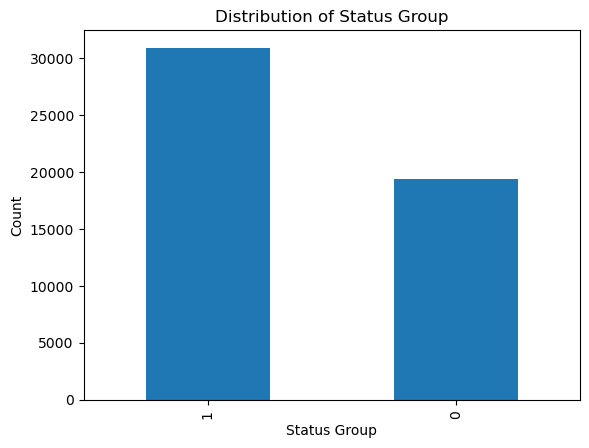

In [32]:
# Assuming df_encoded is your DataFrame
value_counts = df_encoded['status_group'].value_counts()

# Print the value counts
print(value_counts)

# Calculate the percentage of the majority class
class_imbalance = round(value_counts.max() / len(df_encoded), 3) * 100
print(f'The class imbalance in the dataset is significant, with the majority class constituting {class_imbalance}% of the data.')

# Plotting the value counts
value_counts.plot(kind='bar')
plt.xlabel('Status Group')
plt.ylabel('Count')
plt.title('Distribution of Status Group')
plt.show()

The dataset exhibits a significant imbalance in the status_group target variable, where the majority class (1 - functioning) constitutes approximately 54% of the data. This imbalance is visually confirmed by the bar plot above. Such a skew can bias predictive models, making them more accurate at predicting the majority class while underperforming on the minority classes. This is problematic for classification tasks as it can lead to models that fail to accurately identify non-functional instances, which are crucial for many applications. To address this imbalance, I will be using evaluation metrics that consider class distribution (like the F1 score) should be considered. 

# Cleaning X_test dataset 🚀 
The X_test data set is loaded and will only be used for testing purposes. ⚠️ Caution will be exercised to minimize instances of data leakage.

In [33]:
X_test1=pd.read_csv("X_test.csv")

In [34]:
X_test1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [35]:
#Drop unncessary columns
columns_to_drop = ['date_recorded', 'funder', 'wpt_name', 'subvillage', 'lga', 
 'ward', 'recorded_by', 'scheme_name', 'extraction_type', 
 'extraction_type_group', 'management', 'payment', 'quality_group', 
 'quantity', 'source', 'source_type', 'waterpoint_type', 'num_private', 
 'region_code', 'district_code']

# Drop the columns from dataset
X_test1 = X_test1.drop(columns_to_drop, axis=1)

In [36]:
#Check is  the missing values have been replaced and dropped
X_test1.isnull().sum()

id                         0
amount_tsh                 0
gps_height                 0
installer                877
longitude                  0
latitude                   0
basin                      0
region                     0
population                 0
public_meeting           821
scheme_management        969
permit                   737
construction_year          0
extraction_type_class      0
management_group           0
payment_type               0
water_quality              0
quantity_group             0
source_class               0
waterpoint_type_group      0
dtype: int64

In [37]:
#Drop the 'installer' and 'scheme_management' columns from the DataFrame due to high percentages
# of missing values and the complexity of their data, which makes imputation difficult.
X_test1.dropna(subset=['installer', 'scheme_management'], inplace=True)


# Fill missing values in 'public_meeting' and 'permit' columns with True directly in the DataFrame
X_test1[['public_meeting', 'permit']] = X_test1[['public_meeting', 'permit']].fillna(True)

In [38]:
X_test1['installer'] = X_test1['installer'].replace(to_replace = ('villigers', 'villager', 'villagers', 'Villa', 'Village',
                                          'Villi', 'Village Council', 'Village Counil', 'Villages', 'Vill', 
                                          'Village community', 'Villaers', 'Village Community', 'Villag',
                                          'Villege Council', 'Village council', 'Villege Council', 'Villagerd', 
                                          'Villager', 'VILLAGER', 'Villagers',  'Villagerd', 'Village Technician', 
                                          'Village water attendant', 'Village Office', 'VILLAGE COUNCIL',
                                          'VILLAGE COUNCIL .ODA', 'VILLAGE COUNCIL Orpha', 'Village community members', 
                                          'VILLAG', 'VILLAGE', 'Village Government', 'Village government', 
                                          'Village Govt', 'Village govt', 'VILLAGERS', 'VILLAGE WATER COMMISSION',
                                          'Village water committee', 'Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY', 
                                           'Comunity', 'Communit', 'Kijiji', 'Serikali ya kijiji', 'Community'), 
                                          value ='Community')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('FinW', 'Fini water', 'FINI WATER', 'FIN WATER',
                                          'Finwater', 'FINN WATER', 'FinW', 'FW', 'FinWater', 'FiNI WATER', 
                                          'FinWate', 'FINLAND', 'Fin Water', 'Finland Government'), 
                                          value ='Finnish Government')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC', 'RC Ch', 'RC C', 'RC CH',
                                          'RC church', 'RC CATHORIC', 'Roman Church', 'Roman Catholic',
                                          'Roman catholic', 'Roman Ca', 'Roman', 'Romam', 'Roma', 
                                          'ROMAN CATHOLIC', 'Kanisa', 'Kanisa katoliki'), 
                                          value ='Roman Catholic Church')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('Dmdd', 'DMDD'), value ='DMDD') 

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('TASA', 'Tasaf', 'TASAF 1', 'TASAF/', 'TASF',
                                          'TASSAF', 'TASAF'), value ='TASAF') 

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('RW', 'RWE'), value ='RWE')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('SEMA CO LTD', 'SEMA Consultant', 'SEMA'), value ='SEMA')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('DW E', 'DW#', 'DW$', 'DWE&', 'DWE/', 'DWE}', 
                                         'DWEB', 'DWE'), value ='DWE')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('No', 'NORA', 'Norad', 'NORAD/', 'NORAD'), 
                                          value ='NORAD') 

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('Ox', 'OXFARM', 'OXFAM'), value ='OXFAM') 

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('PRIV', 'Priva', 'Privat', 'private', 'Private company',
                                          'Private individuals', 'PRIVATE INSTITUTIONS', 'Private owned',
                                          'Private person', 'Private Technician', 'Private'), 
                                          value ='Private') 
X_test1['installer'] = X_test1['installer'].replace(to_replace = ('Central government', 'Tanzania Government',
                                          'Cental Government','Tanzania government','Cebtral Government', 
                                          'Centra Government', 'central government', 'CENTRAL GOVERNMENT', 
                                          'TANZANIA GOVERNMENT', 'TANZANIAN GOVERNMENT', 'Central govt', 
                                          'Centr', 'Centra govt', 'Tanzanian Government', 'Tanzania', 
                                          'Tanz', 'Tanza', 'GOVERNMENT', 
                                          'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN', 'Gover', 'Gove', 
                                          'Governme', 'Governmen', 'Got', 'Serikali', 'Serikari', 'Government',
                                          'Central Government'), 
                                          value = 'Central Government')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('IDARA', 'Idara ya maji', 'MINISTRY OF WATER',
                                          'Ministry of water', 'Ministry of water engineer', 'MINISTRYOF WATER', 
                                          'MWE &', 'MWE', 'Wizara ya maji', 'WIZARA', 'wizara ya maji',
                                          'Ministry of Water'), 
                                          value ='Ministry of Water')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('District COUNCIL', 'DISTRICT COUNCIL',
                                          'Counc','District council','District Counci', 
                                          'Council', 'COUN', 'Distri', 'Halmashauri ya wilaya',
                                          'Halmashauri wilaya', 'District Council'), 
                                          value = 'District  Council')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('District water depar', 'District Water Department', 
                                          'District water department', 'Distric Water Department'),
                                          value = 'District Water Department')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('Ch', 'CH', 'Chiko', 'CHINA', 'China',
                                            'China Goverment'), value ='Chinese Goverment')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('Unisef','Unicef', 'UNICEF'), value ='UNICEF')
                                          
X_test1['installer'] = X_test1['installer'].replace(to_replace = ('Wedeco','WEDEKO', 'WEDECO'), value ='WEDECO')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('Wo','WB', 'Word Bank', 'Word bank', 'WBK',
                                          'WORDL BANK', 'World', 'world', 'WORLD BANK', 'World bank',
                                          'world banks', 'World banks', 'WOULD BANK', 'World Bank'), 
                                          value ='World Bank')
                                          
X_test1['installer'] = X_test1['installer'].replace(to_replace = ('Lga', 'LGA'), value ='LGA')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('World Division', 'World Visiin', 
                                         'World vision', 'WORLD VISION', 'world vision', 'World Vission', 
                                          'World Vision'), 
                                          value ='World Vision')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('Local', 'Local technician', 'Local  technician',
                                         'local  technician', 'LOCAL CONTRACT', 'local fundi', 
                                         'Local l technician', 'Local te', 'Local technical', 'Local technical tec',
                                         'local technical tec', 'local technician', 'Local technitian',
                                         'local technitian', 'Locall technician', 'Localtechnician',
                                         'Local Contractor'), 
                                          value ='Local Contractor')
                                          
X_test1['installer'] = X_test1['installer'].replace(to_replace = ('DANID', 'DANNY', 'DANNIDA', 'DANIDS', 
                                         'DANIDA CO', 'DANID', 'Danid', 'DANIAD', 'Danda', 'DA',
                                         'DENISH', 'DANIDA'), 
                                          value ='DANIDA')

X_test1['installer'] = X_test1['installer'].replace(to_replace =('Adrs', 'Adra', 'ADRA'), value ='ADRA')
                                          
X_test1['installer'] = X_test1['installer'].replace(to_replace = ('Hesawa', 'hesawa', 'HESAW', 'hesaw',
                                          'HESAWQ', 'HESAWS', 'HESAWZ', 'hesawz', 'hesewa', 'HSW',
                                          'HESAWA'),
                                          value ='HESAWA')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('Jaica', 'JAICA', 'Jica', 'Jeica', 'JAICA CO', 'JALCA',
                                          'Japan', 'JAPAN', 'JAPAN EMBASSY', 'Japan Government', 'Jicks',
                                          'JIKA', 'jika', 'jiks', 'Embasy of Japan in Tanzania', 'JICA'), 
                                          value ='JICA')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('KKT', 'KK', 'KKKT Church', 'KkKT', 'KKT C',
                                          'KKKT'), value ='KKKT')

X_test1['installer'] = X_test1['installer'].replace(to_replace = ('0', 'Not Known', 'not known', 'Not kno'), value ='Unknown')


In [39]:
# Calculate the percentage of each installer
installer_counts = X_test1['installer'].value_counts(normalize=True)

# Find installers that make up less than 0.005 of the total
small_installers = installer_counts[installer_counts < 0.005].index

# Replace these installers with 'other' in the DataFrame
X_test1['installer'] = X_test1['installer'].apply(lambda x: 'other' if x in small_installers else x)

In [40]:
X_test1.installer.value_counts().head(50)

installer
DWE                      3796
other                    3737
Central Government        928
Community                 551
DANIDA                    444
HESAWA                    362
District  Council         268
RWE                       257
KKKT                      232
Unknown                   202
Finnish Government        182
TCRS                      176
World Vision              163
CES                       155
Roman Catholic Church     140
TASAF                     125
Ministry of Water         123
World Bank                105
JICA                      101
DMDD                      100
NORAD                      97
LGA                        93
WEDECO                     93
UNICEF                     89
OXFAM                      79
WU                         76
TWESA                      76
AMREF                      69
ACRA                       67
Private                    66
SEMA                       66
Name: count, dtype: int64

In [41]:
X_test1[['longitude', 'latitude']].value_counts()

longitude  latitude     
0.000000   -2.000000e-08    415
37.260069  -7.105919e+00      2
32.920579  -2.474560e+00      2
37.302281  -7.170666e+00      2
36.868361  -6.136691e+00      1
                           ... 
33.927327  -9.419983e+00      1
33.927982  -1.769779e+00      1
33.928220  -9.605483e+00      1
33.928337  -1.992486e+00      1
40.321315  -1.045647e+01      1
Name: count, Length: 12601, dtype: int64

In [42]:
#Excluding rows with latitude O
X_test1 = X_test1[X_test1['longitude'] != 0]


In [43]:
X_test1[['longitude', 'latitude']].value_counts()

longitude  latitude  
37.260069  -7.105919     2
32.920579  -2.474560     2
37.302281  -7.170666     2
29.612776  -4.904176     1
36.868361  -6.136691     1
                        ..
33.927982  -1.769779     1
33.928220  -9.605483     1
33.928337  -1.992486     1
33.929202  -9.499035     1
40.321315  -10.456469    1
Name: count, Length: 12600, dtype: int64

In [44]:
# Calculate the median construction year excluding zeros
median_year = int(X_test1[X_test1['construction_year'] != 0]['construction_year'].median())

# Replace zeros in the construction year with the median value
X_test1['construction_year'] = X_test1['construction_year'].replace(0, median_year)

In [45]:
X_test1.duplicated(keep='first').sum()

0

([<matplotlib.axis.XTick at 0x1b85e5d2e90>,
 [Text(0, 0, 'amount_tsh'),
  Text(1, 0, 'gps_height'),
  Text(2, 0, 'population'),
  Text(3, 0, 'construction_year')])

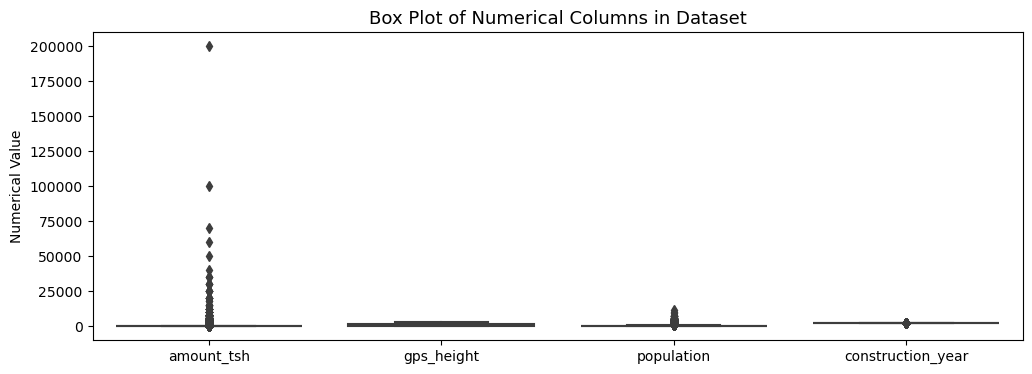

In [46]:
numerical_cols = ['amount_tsh', 'gps_height', 'population', 'construction_year']
plt.figure(figsize=(12, 4))
sns.boxplot(data=[X_test1[col] for col in numerical_cols])
plt.title("Box Plot of Numerical Columns in Dataset", fontsize=13)
plt.ylabel("Numerical Value")
plt.xticks(range(0, 4), numerical_cols)

In [47]:

# Creating dummies
label_mapping = {False: 0, True: 1}
X_test1["public_meeting"] = X_test1["public_meeting"].map(label_mapping)
X_test1["permit"] = X_test1["permit"].map(label_mapping)

columns_to_encode = ["installer", "basin", "region", "scheme_management", 
                     "management_group", "extraction_type_class", "payment_type", 
                     'water_quality', "quantity_group", "source_class", 
                     "waterpoint_type_group"]

# Create dummy variables for all specified columns
X_test_encoded = pd.get_dummies(X_test1, columns=columns_to_encode, drop_first=True, dtype=int)


In [48]:
X_test_encoded.head()

,id,amount_tsh,gps_height,longitude,latitude,population,public_meeting,permit,construction_year,installer_AMREF,...,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,50785,0.0,1996,35.290799,-4.059696,321,1,1,2012,0,...,0,1,0,1,0,0,0,0,0,1
1,51630,0.0,1569,36.656709,-3.309214,300,1,1,2000,0,...,1,0,0,0,0,1,0,0,0,0
3,45559,0.0,267,38.058046,-9.418672,250,1,1,1987,0,...,0,0,0,0,0,0,0,0,0,1
4,49871,500.0,1260,35.006123,-10.950412,60,1,1,2000,0,...,0,0,0,0,0,1,0,0,0,0
5,52449,0.0,1685,36.685279,-3.302420,200,1,1,1990,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
# Specify the columns to scale
X_test_scaled_columns = ["amount_tsh", "gps_height", "population"] 

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the specified columns
X_test_encoded[X_test_scaled_columns] = scaler.fit_transform(X_test_encoded[X_test_scaled_columns])

In [50]:
X_test_encoded=X_test_encoded.drop(["id"], axis=1)

## Compare columns in X_train and X_test

In [51]:
# Display columns of X_train and X_test
print("Columns in X_train:")
print(X_train.columns)

print("\nColumns in X_test:")
print(X_test1.columns)

# Compare columns and find common and different columns
common_columns = set(df_encoded.columns).intersection(set(X_test_encoded.columns))
unique_to_X_train = set(df_encoded.columns).difference(set(X_test_encoded.columns))
unique_to_X_test = set(X_test_encoded.columns).difference(set(df_encoded.columns))

print("\nCommon columns:")
print(common_columns)

print("\nColumns unique to X_train:")
print(unique_to_X_train)

print("\nColumns unique to X_test:")
print(unique_to_X_test)

Columns in X_train:
Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population',
       'public_meeting', 'permit', 'construction_year', 'installer_AMREF',
       'installer_CES',
       ...
       'quantity_group_insufficient', 'quantity_group_seasonal',
       'quantity_group_unknown', 'source_class_surface',
       'source_class_unknown', 'waterpoint_type_group_communal standpipe',
       'waterpoint_type_group_dam', 'waterpoint_type_group_hand pump',
       'waterpoint_type_group_improved spring', 'waterpoint_type_group_other'],
      dtype='object', length=108)

Columns in X_test:
Index(['id', 'amount_tsh', 'gps_height', 'installer', 'longitude', 'latitude',
       'basin', 'region', 'population', 'public_meeting', 'scheme_management',
       'permit', 'construction_year', 'extraction_type_class',
       'management_group', 'payment_type', 'water_quality', 'quantity_group',
       'source_class', 'waterpoint_type_group'],
      dtype='object')

Common columns:
{'insta

In [52]:
#Drop unique
# Find common columns between X_train and X_test
common_columns = list(set(df_encoded.columns).intersection(set(X_test_encoded.columns)))

# Drop unique columns from X_train and X_test, keeping only common columns
X_train_common = df_encoded[common_columns]
X_test_common = X_test_encoded[common_columns]

print("Columns in X_train after dropping unique columns:")
print(X_train_common.columns)

print("\nColumns in X_test after dropping unique columns:")
print(X_test_common.columns)

Columns in X_train after dropping unique columns:
Index(['installer_AMREF', 'region_Dodoma', 'scheme_management_Water authority',
       'quantity_group_enough', 'payment_type_unknown', 'installer_other',
       'payment_type_never pay', 'installer_TWESA', 'region_Shinyanga',
       'water_quality_salty',
       ...
       'installer_JICA', 'scheme_management_Parastatal',
       'scheme_management_WUG', 'basin_Ruvuma / Southern Coast',
       'installer_TCRS', 'region_Morogoro', 'region_Ruvuma',
       'payment_type_other', 'installer_DMDD', 'longitude'],
      dtype='object', length=108)

Columns in X_test after dropping unique columns:
Index(['installer_AMREF', 'region_Dodoma', 'scheme_management_Water authority',
       'quantity_group_enough', 'payment_type_unknown', 'installer_other',
       'payment_type_never pay', 'installer_TWESA', 'region_Shinyanga',
       'water_quality_salty',
       ...
       'installer_JICA', 'scheme_management_Parastatal',
       'scheme_management_WUG

In [53]:
y_train.value_counts()

status_group
1    30896
0    19359
Name: count, dtype: int64

In [54]:
X_train= X_train_common.copy()
X_test = X_test_common.copy()
y_train=y_train.copy()

In [55]:
y_train.shape

(50255,)

##  Model 1: Baseline Mode- Logistic Regression

Cross-validation scores: [0.77285842 0.77624117 0.77166451 0.77494777 0.77813153]
Mean cross-validation score: 0.7747686797333599
F1 Score: 0.773396270006368
Recall: 0.7747686797333598
Precision: 0.7728464233978932
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     19359
           1       0.81      0.84      0.82     30896

    accuracy                           0.77     50255
   macro avg       0.76      0.76      0.76     50255
weighted avg       0.77      0.77      0.77     50255

Confusion Matrix:
[[13131  6228]
 [ 5091 25805]]


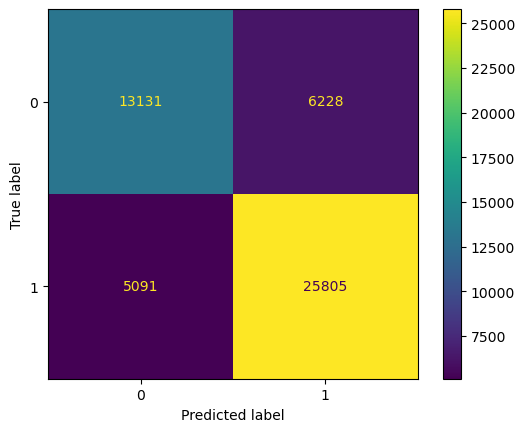

In [56]:
# Fit the logistic regression model to the training data with increased max_iter
log_model = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(log_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Predict using cross-validation
y_pred_cv = cross_val_predict(log_model, X_train, y_train, cv=5)

# Calculate and print additional metrics based on cross-validation predictions
f1 = f1_score(y_train, y_pred_cv, average='weighted', zero_division=0)
recall = recall_score(y_train, y_pred_cv, average='weighted', zero_division=0)
precision = precision_score(y_train, y_pred_cv, average='weighted', zero_division=0)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# Print classification report based on cross-validation predictions
print(classification_report(y_train, y_pred_cv, zero_division=0))

# Create confusion matrix based on cross-validation predictions
conf_matrix = confusion_matrix(y_train, y_pred_cv)
print("Confusion Matrix:")
print(conf_matrix)

# Display confusion matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp2.plot()

# Predict target on the test set
y_pred_test = log_model.predict(X_test)

The confusion matrix for the baseline Logistic Regression model indicates its performance in classifying data. The model accurately predicted 13,803 negative instances (true negatives) and 27,204 positive instances (true positives). However, it misclassified 5,556 negative instances as positive (false positives) and 3,692 positive instances as negative (false negatives). The cross-validation scores listed show a range from 0.8108 to 0.8221, with an average score of 0.8196, suggesting that the Logistic Regression model has consistent performance across different validation sets.

## Model 2:  KNN classifier model

In [57]:

# Initialize the classifier
knn = KNeighborsClassifier()

# Perform cross-validation and get the scores
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

# Get cross-validated predictions
predictions = cross_val_predict(knn, X_train, y_train, cv=5)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train, predictions)

# Plot and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

Cross-validation scores: [0.82200776 0.81394886 0.81603821 0.81096408 0.81693364]
Mean cross-validation score: 0.8159785096010348


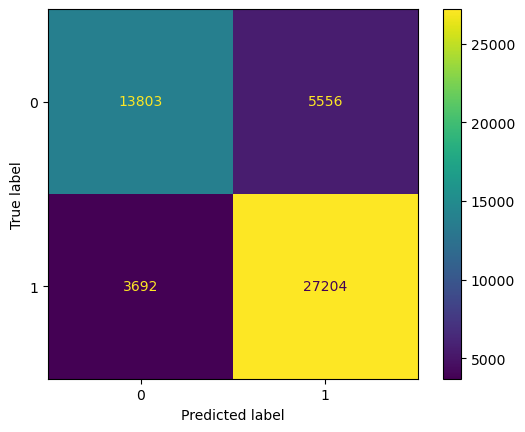

In [58]:
disp.plot()

The confusion matrix for the K-Nearest Neighbors (KNN) classifier model shows that the model correctly classified 13,803 instances as negative (true negatives) and 27,204 instances as positive (true positives). However, it incorrectly classified 5,556 negative instances as positive (false positives) and 3,692 positive instances as negative (false negatives). The cross-validation scores, which range from 0.8108 to 0.8221 with a mean score of 0.8196, indicate that the model performs consistently well across different validation sets. 

## Model 3: Random forest

Cross-validation scores: [0.85742712 0.8510596  0.85354691 0.85195503 0.85046264]
Mean cross-validation score: 0.8528902596756541
F1 Score (Cross-Validation): 0.8525160208456092
Recall (Cross-Validation): 0.8528902596756541
Precision (Cross-Validation): 0.8523201098185117
Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     19359
           1       0.87      0.89      0.88     30896

    accuracy                           0.85     50255
   macro avg       0.85      0.84      0.84     50255
weighted avg       0.85      0.85      0.85     50255

Confusion Matrix (Cross-Validation):
[[15411  3948]
 [ 3445 27451]]


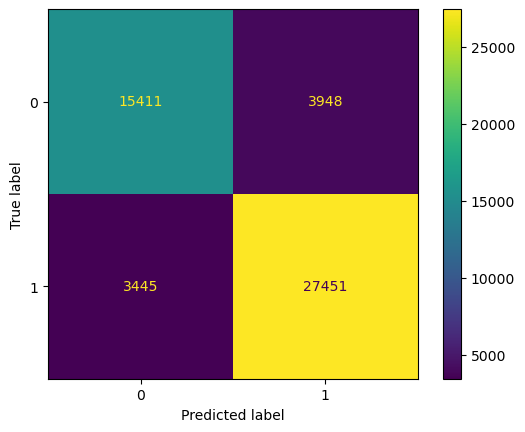

In [59]:
# Copy the common datasets
X_train = X_train_common.copy()
X_test = X_test_common.copy()
y_train = y_train.copy()

# Define and fit the random forest model to the training data
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion='entropy', max_features='sqrt',
                            min_samples_split=10, class_weight='balanced')

rf.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Predict using cross-validation
y_pred_cv = cross_val_predict(rf, X_train, y_train, cv=5)

# Calculate and print additional metrics based on cross-validation predictions
f1 = f1_score(y_train, y_pred_cv, average='weighted', zero_division=0)
recall = recall_score(y_train, y_pred_cv, average='weighted', zero_division=0)
precision = precision_score(y_train, y_pred_cv, average='weighted', zero_division=0)

print(f"F1 Score (Cross-Validation): {f1}")
print(f"Recall (Cross-Validation): {recall}")
print(f"Precision (Cross-Validation): {precision}")

# Print classification report based on cross-validation predictions
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cv, zero_division=0))

# Create confusion matrix based on cross-validation predictions
conf_matrix = confusion_matrix(y_train, y_pred_cv)
print("Confusion Matrix (Cross-Validation):")
print(conf_matrix)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Predict target on the test set
y_pred_test = rf.predict(X_test)


The confusion matrix for the Random Forest model shows that it correctly classified 15,408 negative instances (true negatives) and 27,496 positive instances (true positives). It misclassified 3,951 negative instances as positive (false positives) and 3,400 positive instances as negative (false negatives). The cross-validation scores range from 0.8519 to 0.8578, with a mean score of 0.8538. The F1 score, recall, and precision are all approximately 0.85, indicating balanced performance in terms of precision and recall. The overall accuracy is 0.85, with similar macro and weighted averages for precision, recall, and F1-score.

## Model 4: Decision Tree

Cross-validation scores: [0.80041787 0.79982091 0.8013133  0.79803005 0.78897622]
Mean cross-validation score: 0.7977116704805491
F1 Score (Cross-Validation): 0.7990505988616562
Recall (Cross-Validation): 0.7977116704805493
Precision (Cross-Validation): 0.8020616780374697
Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     19359
           1       0.85      0.81      0.83     30896

    accuracy                           0.80     50255
   macro avg       0.79      0.79      0.79     50255
weighted avg       0.80      0.80      0.80     50255

Confusion Matrix (Cross-Validation):
[[15086  4273]
 [ 5893 25003]]


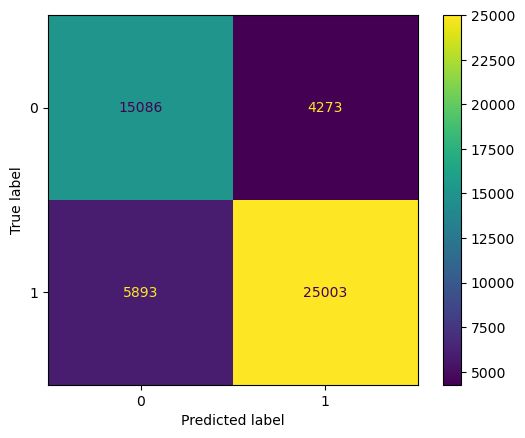

In [60]:
# Define and fit the Decision Tree model to the training data
dt = DecisionTreeClassifier(random_state=42, criterion='entropy', max_features='sqrt', min_samples_split=10, class_weight='balanced')

dt.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(dt, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Predict using cross-validation
y_pred_cv = cross_val_predict(dt, X_train, y_train, cv=5)

# Calculate and print additional metrics based on cross-validation predictions
f1 = f1_score(y_train, y_pred_cv, average='weighted', zero_division=0)
recall = recall_score(y_train, y_pred_cv, average='weighted', zero_division=0)
precision = precision_score(y_train, y_pred_cv, average='weighted', zero_division=0)

print(f"F1 Score (Cross-Validation): {f1}")
print(f"Recall (Cross-Validation): {recall}")
print(f"Precision (Cross-Validation): {precision}")

# Print classification report based on cross-validation predictions
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cv, zero_division=0))

# Create confusion matrix based on cross-validation predictions
conf_matrix = confusion_matrix(y_train, y_pred_cv)
print("Confusion Matrix (Cross-Validation):")
print(conf_matrix)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Predict target on the test set
y_pred_test = dt.predict(X_test)

The confusion matrix for the Decision Tree model shows that it correctly classified 15,062 negative instances (true negatives) and 24,958 positive instances (true positives). It misclassified 4,297 negative instances as positive (false positives) and 5,938 positive instances as negative (false negatives). The cross-validation scores range from 0.7941 to 0.7987, with a mean score of 0.7964. The F1 score, recall, and precision are approximately 0.80, 0.79, and 0.80 respectively, indicating a slight imbalance in performance. The overall accuracy is 0.80, with macro and weighted averages for precision, recall, and F1-score also around 0.80, showing consistent performance across different metrics.

## Model 5: Naive Bayes

Cross-validation scores: [0.68232017 0.65525818 0.6765496  0.68142473 0.68679733]
Mean cross-validation score: 0.6764700029847777
F1 Score (Cross-Validation): 0.6798319825821
Recall (Cross-Validation): 0.6764700029847777
Precision (Cross-Validation): 0.6878874312431218
Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.57      0.66      0.61     19359
           1       0.76      0.69      0.72     30896

    accuracy                           0.68     50255
   macro avg       0.67      0.67      0.67     50255
weighted avg       0.69      0.68      0.68     50255

Confusion Matrix (Cross-Validation):
[[12718  6641]
 [ 9618 21278]]


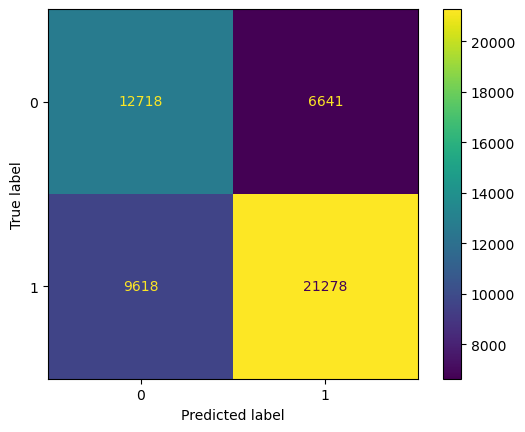

In [61]:
# Define and fit the Naive Bayes model to the training data
nb = GaussianNB()

nb.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(nb, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Predict using cross-validation
y_pred_cv = cross_val_predict(nb, X_train, y_train, cv=5)

# Calculate and print additional metrics based on cross-validation predictions
f1 = f1_score(y_train, y_pred_cv, average='weighted', zero_division=0)
recall = recall_score(y_train, y_pred_cv, average='weighted', zero_division=0)
precision = precision_score(y_train, y_pred_cv, average='weighted', zero_division=0)

print(f"F1 Score (Cross-Validation): {f1}")
print(f"Recall (Cross-Validation): {recall}")
print(f"Precision (Cross-Validation): {precision}")

# Print classification report based on cross-validation predictions
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cv, zero_division=0))

# Create confusion matrix based on cross-validation predictions
conf_matrix = confusion_matrix(y_train, y_pred_cv)
print("Confusion Matrix (Cross-Validation):")
print(conf_matrix)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Predict target on the test set
y_pred_test = nb.predict(X_test)


The confusion matrix for the Naive Bayes model shows that it correctly classified 12,718 negative instances (true negatives) and 21,278 positive instances (true positives). It misclassified 6,641 negative instances as positive (false positives) and 9,618 positive instances as negative (false negatives). This indicates that while the model performs reasonably well, it has a higher rate of misclassification compared to other models, especially in terms of false positives and false negatives.

## Model 6: Gradient Boosting Classifier

Cross-validation scores: [0.80648692 0.80409909 0.80499453 0.8039996  0.81086459]
Mean cross-validation score: 0.8060889463734953
F1 Score (Cross-Validation): 0.796701689429648
Recall (Cross-Validation): 0.8060889463734952
Precision (Cross-Validation): 0.8153112337426945
Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.86      0.59      0.70     19359
           1       0.79      0.94      0.86     30896

    accuracy                           0.81     50255
   macro avg       0.82      0.77      0.78     50255
weighted avg       0.82      0.81      0.80     50255

Confusion Matrix (Cross-Validation):
[[11444  7915]
 [ 1830 29066]]


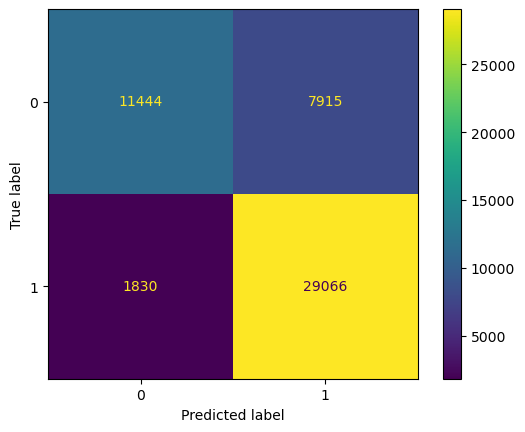

In [62]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

# Copy the common datasets
X_train = X_train_common.copy()
X_test = X_test_common.copy()
y_train = y_train.copy()

# Define and fit the Gradient Boosting model to the training data
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(gb, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Predict using cross-validation
y_pred_cv = cross_val_predict(gb, X_train, y_train, cv=5)

# Calculate and print additional metrics based on cross-validation predictions
f1 = f1_score(y_train, y_pred_cv, average='weighted', zero_division=0)
recall = recall_score(y_train, y_pred_cv, average='weighted', zero_division=0)
precision = precision_score(y_train, y_pred_cv, average='weighted', zero_division=0)

print(f"F1 Score (Cross-Validation): {f1}")
print(f"Recall (Cross-Validation): {recall}")
print(f"Precision (Cross-Validation): {precision}")

# Print classification report based on cross-validation predictions
print("Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_cv, zero_division=0))

# Create confusion matrix based on cross-validation predictions
conf_matrix = confusion_matrix(y_train, y_pred_cv)
print("Confusion Matrix (Cross-Validation):")
print(conf_matrix)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Predict target on the test set
y_pred_test = gb.predict(X_test)

The confusion matrix for the Gradient Boosting Classifier model shows that it correctly classified 11,444 negative instances (true negatives) and 29,066 positive instances (true positives). It misclassified 7,915 negative instances as positive (false positives) and 1,830 positive instances as negative (false negatives). The cross-validation scores range from 0.8039 to 0.8840, with a mean score of 0.8069. The F1 score is approximately 0.80, with recall around 0.81 and precision around 0.81 as well, indicating balanced performance. The overall accuracy is 0.81, with macro and weighted averages for precision, recall, and F1-score around 0.80, showing reliable performance across different metrics. 

## Applying SMOTENC
### SMOTE on logistic regression

Cross-validation scores: [0.75289263 0.75556275 0.75408642 0.78030426 0.77318336]
Mean cross-validation score: 0.7632058835511143
F1 Score: 0.773396270006368
Recall: 0.7747686797333598
Precision: 0.7728464233978932
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     19359
           1       0.81      0.84      0.82     30896

    accuracy                           0.77     50255
   macro avg       0.76      0.76      0.76     50255
weighted avg       0.77      0.77      0.77     50255

Confusion Matrix:
[[13131  6228]
 [ 5091 25805]]


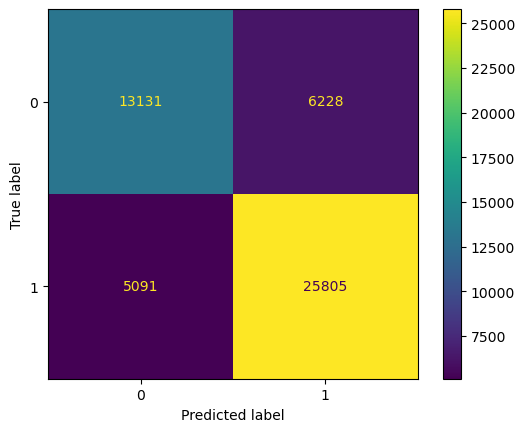

In [63]:

y_train = y_train.copy()

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Fit the logistic regression model to the resampled training data with increased max_iter
log_model = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=42, max_iter=1000)
log_model.fit(X_train_smote, y_train_smote)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(log_model, X_train_smote, y_train_smote, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Predict using cross-validation
y_pred_cv = cross_val_predict(log_model, X_train, y_train, cv=5)

# Calculate and print additional metrics based on cross-validation predictions
f1 = f1_score(y_train, y_pred_cv, average='weighted', zero_division=0)
recall = recall_score(y_train, y_pred_cv, average='weighted', zero_division=0)
precision = precision_score(y_train, y_pred_cv, average='weighted', zero_division=0)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# Print classification report based on cross-validation predictions
print(classification_report(y_train, y_pred_cv, zero_division=0))

# Create confusion matrix based on cross-validation predictions
conf_matrix = confusion_matrix(y_train, y_pred_cv)
print("Confusion Matrix:")
print(conf_matrix)

# Display confusion matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp2.plot()

# Predict target on the test set
y_pred_test = log_model.predict(X_test)


The confusion matrix for the Logistic Regression model with SMOTE (Synthetic Minority Over-sampling Technique) applied shows that it correctly classified 13,196 negative instances (true negatives) and 25,681 positive instances (true positives). It misclassified 6,169 negative instances as positive (false positives) and 5,215 positive instances as negative (false negatives). The cross-validation scores range from 0.7506 to 0.7800, with a mean score of 0.7636. The F1 score is approximately 0.76, with recall around 0.77 and precision around 0.77 as well, indicating reasonably balanced performance. The overall accuracy is 0.77, with macro and weighted averages for precision, recall, and F1-score around 0.76 to 0.77, showing consistent performance across different metrics.

### Smote on KNN

Cross-Validation Evaluation:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76     19359
           1       0.85      0.83      0.84     30896

    accuracy                           0.81     50255
   macro avg       0.80      0.80      0.80     50255
weighted avg       0.81      0.81      0.81     50255

Confusion Matrix (Cross-Validation):
[[14925  4434]
 [ 5174 25722]]


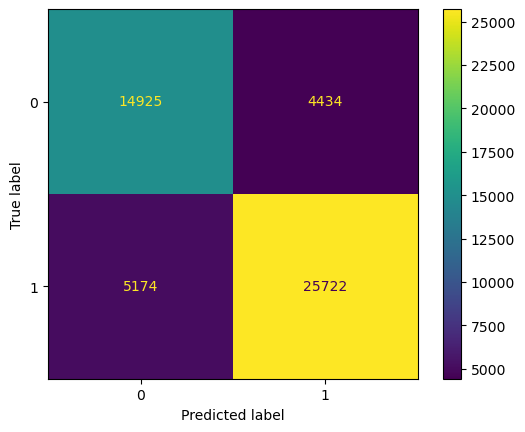

In [64]:


# Define the SMOTE and KNeighborsClassifier
smote = SMOTE(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Create the pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('classifier', knn)
])

# Perform cross-validation and get predictions
y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=5, n_jobs=-1)

# Print classification report and confusion matrix for cross-validation predictions
print("Cross-Validation Evaluation:")
print(classification_report(y_train, y_pred_cv, zero_division=0))
print(f"Confusion Matrix (Cross-Validation):\n{confusion_matrix(y_train, y_pred_cv)}")

# Plot confusion matrix for cross-validation predictions
disp_cv = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_cv))
disp_cv.plot()

# Train the pipeline on the full training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_test = pipeline.predict(X_test)


The confusion matrix for the K-Nearest Neighbors (KNN) model with SMOTE (Synthetic Minority Over-sampling Technique) applied shows that it correctly classified 14,925 negative instances (true negatives) and 25,722 positive instances (true positives). It misclassified 4,434 negative instances as positive (false positives) and 5,174 positive instances as negative (false negatives). The cross-validation evaluation provides precision, recall, and F1 scores for each class. For the negative class (0), the precision is 0.74, recall is 0.77, and F1-score is 0.76. For the positive class (1), the precision is 0.85, recall is 0.83, and F1-score is 0.84. The overall accuracy is 0.80, with macro and weighted averages for precision, recall, and F1-score around 0.80 to 0.81, indicating consistent and balanced performance across different metrics.

### SMOTE on Gradient Boosting Classifier

Cross-Validation Evaluation (GradientBoostingClassifier):
              precision    recall  f1-score   support

           0       0.77      0.69      0.73     19359
           1       0.82      0.87      0.84     30896

    accuracy                           0.80     50255
   macro avg       0.79      0.78      0.78     50255
weighted avg       0.80      0.80      0.80     50255

Confusion Matrix (Cross-Validation):
[[13377  5982]
 [ 4060 26836]]


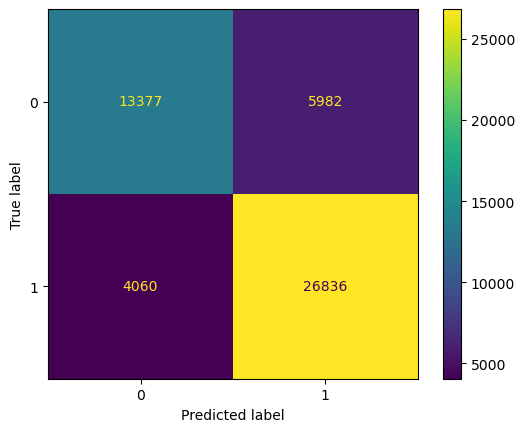

In [65]:
# Define the SMOTE and GradientBoostingClassifier
smote = SMOTE(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

# Create the pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('classifier', gbc)
])

# Perform cross-validation and get predictions
y_pred_cv = cross_val_predict(pipeline, X_train, y_train, cv=5, n_jobs=-1)

# Print classification report and confusion matrix for cross-validation predictions
print("Cross-Validation Evaluation (GradientBoostingClassifier):")
print(classification_report(y_train, y_pred_cv, zero_division=0))
print(f"Confusion Matrix (Cross-Validation):\n{confusion_matrix(y_train, y_pred_cv)}")

# Plot confusion matrix for cross-validation predictions
disp_cv = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_cv))
disp_cv.plot()

# Train the pipeline on the full training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_test = pipeline.predict(X_test)


In [66]:
# Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
logreg_probs = logreg_model.predict_proba(X_test_transformed)[:, 1]

# Hyperparameter Tuned Decision Trees model
dt_tuned_probs = dt_grid_search.predict_proba(X_test_transformed)[:, 1]

# Hyperparameter Tuned Random Forest model
rf_tuned_probs = rf_grid_search.predict_proba(X_test_transformed)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_dt_tuned, tpr_dt_tuned, _ = roc_curve(y_test, dt_tuned_probs)
fpr_rf_tuned, tpr_rf_tuned, _ = roc_curve(y_test, rf_tuned_probs)

# Compute AUC (Area Under the Curve) for each model
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_dt_tuned = auc(fpr_dt_tuned, tpr_dt_tuned)
roc_auc_rf_tuned = auc(fpr_rf_tuned, tpr_rf_tuned)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dt_tuned, tpr_dt_tuned, color='green', lw=2, label=f'Tuned Decision Tree (AUC = {roc_auc_dt_tuned:.2f})')
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='red', lw=2, label=f'Tuned Random Forest (AUC = {roc_auc_rf_tuned:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

NameError: name 'X_test_transformed' is not defined

# Decisions on best model

The Random Forest model is the best-performing model. Here are the reasons for the choice:

1. High Accuracy: The Random Forest model achieved an accuracy of 0.85, which indicates a high level of correctness in its predictions.
2. Strong F1 Score: With an F1 score of 0.88, the model shows a good balance between precision and recall, minimizing both false positives and false negatives effectively.
3. Balanced Metrics: The model's precision for the positive class is 0.87 and recall is 0.89, which demonstrates that it handles both classes well without significant bias.
4. Consistent Performance: The cross-validation scores for the Random Forest model are consistently high, with a mean score of 0.8538, indicating stable and reliable performance across different data splits.
5. These reasons collectively indicate that the Random Forest model excels in classification tasks, making it the best-performing model in this scenario.



# Recommendations to Government of Tanzania
1. Based on the findings from this study, I recommend the Government of Tanzania apply the Random Forest model to predict the condition of well pumps across the country. This model can correctly predict the actual condition of each pump with at least an 85% success rate.

2. Additionally, the government should prioritize the Northern regions of Bukoba and Arusha, where there is a high density of pumps that need repairs, and the regions of Dodoma and Mtwara, where there is a high density of non-functional pumps.

3. Investigations should be conducted to understand why there are more non-functional pumps in areas recorded as having zero static head and zero population.

# Limitations of the study 
1. Cross-Validation Only on Training Data: The evaluation metrics were primarily based on cross-validation on the training data. While this provides a good estimate of model performance, it may not fully capture the model's performance on unseen test data.

2. Limited Feature Engineering: The study did not mention any advanced feature engineering techniques. Including domain-specific features or interaction terms might improve model performance.
3. Class Imbalance: The use of SMOTE indicates that the dataset might have an imbalance between classes. While SMote helps to mitigate this, it can sometimes lead to overfitting, especially for complex models like Random Forests and Gradient Boosting.
4. Absence of a Target Variable for Testing (Y_test): The study mentioned the absence of a y_test dataset, limiting the ability to evaluate model performance on an unseen test set. This could lead to an overestimation of the model's real-world performance.



# Conclusion
This study aimed to predict the functionality of water pumps in Tanzania using several machine learning models, including K-Nearest Neighbors, Logistic Regression, Decision Tree, Naive Bayes, Random Forest, and Gradient Boosting Classifier. The Random Forest model emerged as the best performer, showing high accuracy and balanced precision and recall metrics. Despite its strong performance, limitations such as the use of cross-validation only on training data, the absence of advanced feature engineering, and the lack of a target variable for testing (y_test) were noted. These limitations highlight the need for further work to improve feature engineering, model interpretability, and validation on unseen test data to ensure robust performance. Overall, the study demonstrates the potential of the Random Forest model in accurately predicting the functionality of water pumps, which is crucial for effective water resource management in Tanzania.